## Classify Radio Signals from Space with Keras

> In this project, you will learn the basics of using Keras with TensorFlow as its backend and use it to solve an image classification problem. The data consists of 2D spectrograms of deep space radio signals collected by the Allen Telescope Array at the SETI Institute. The spectrograms will be treated as images to train an image classification model to classify the signals into one of four classes. By the end of the project, you will have built and trained a convolutional neural network from scratch using Keras to classify signals from space. 

The model could be optimized using hyperparameter tuning. However, the goal of this notebook is not to build a high performing classifier, rather to show the basic steps to build an image classifier using convolutional neural network. The readers can also get the idea of 
* data augmentation using ImageDataGenerator, and 
* Way of saving the weights of a model at some interval which can later be used for transfer learning through 'callbacks' during fitting the model

### Task 1: Import Libraries

In [4]:

!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.0.0


## Task 2: Load and Preprocess SETI Data

In [5]:
train_images = pd.read_csv('dataset/train/images.csv', header=None)
# There is an error in the training label csv file existing in seti2ddata available on Kaggle. So, uploaded the correct training label
train_labels = pd.read_csv('dataset/train/labels.csv', header=None) 

val_images = pd.read_csv('dataset/validation/images.csv', header=None)
val_labels = pd.read_csv('dataset/validation/labels.csv', header=None)

In [6]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [7]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [8]:
val_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,...,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,...,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,...,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,...,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,...,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824


In [9]:
val_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [10]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)

Training set shape: (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


In [11]:
# reshape the data into a shape that fits with CNN

x_train = train_images.values.reshape(3200, 64, 128, 1)
x_val = val_images.values.reshape(800, 64, 128, 1)

y_train = train_labels.values
y_val = val_labels.values

## Task 3: Plot 2D Spectrograms

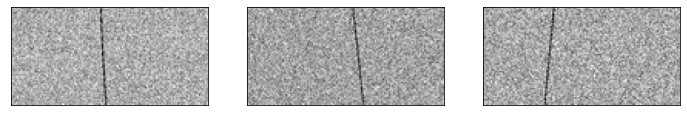

In [12]:
# Take 3 training images randomely and draw them 
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])]) # np.squeeze is used to delete non  useful dimension in (64,128,1) and transform the shape into (64,128) in order to fit into plt.imshow
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap="gray")

## Task 4: Create Training and Validation Data Generators

In [13]:
# Data augmentation using ImageDataGenerator
# An input batch of images is presented to the ImageDataGenerator.
# The ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.
# The randomly transformed batch is then returned to the calling function.
#The ImageDataGenerator is not returning both the original data and the transformed data — the class only returns the randomly transformed data.
# Ref:https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

## Task 5: Creating the CNN Model

In [14]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [16]:
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32,(5,5), padding='same', input_shape=(64, 128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))

## Task 6: Learning Rate Scheduling and Compile the Model

In [17]:
# Here, we have a initial learning rate that is fixed during first 5 steps and decreases exponentially afterwards
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True)   

optimizer = Adam(learning_rate=lr_schedule)

In [18]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # https://www.tutorialspoint.com/keras/keras_model_compilation.htm
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 128, 32)       128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 64, 64)       

## Task 7: Training the Model

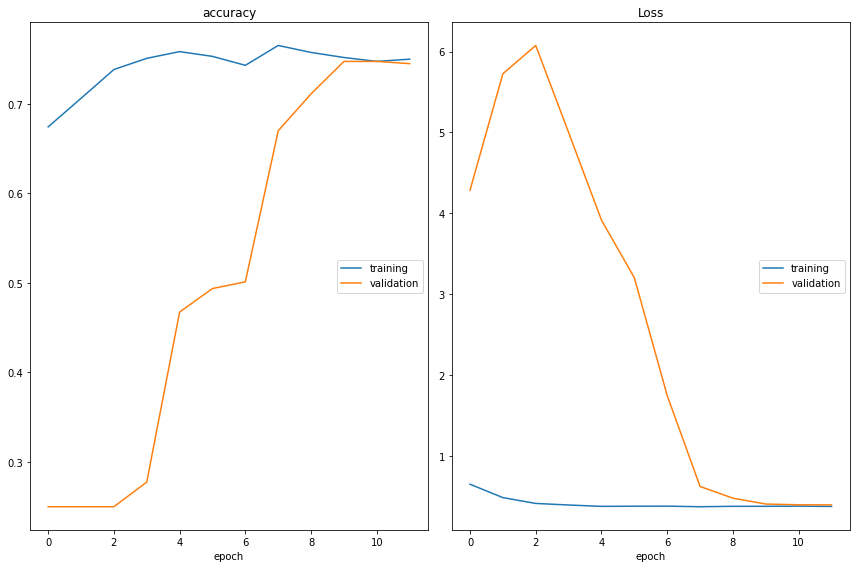

accuracy
	training         	 (min:    0.674, max:    0.765, cur:    0.750)
	validation       	 (min:    0.250, max:    0.748, cur:    0.745)
Loss
	training         	 (min:    0.372, max:    0.651, cur:    0.376)
	validation       	 (min:    0.395, max:    6.076, cur:    0.395)
100/100 [==============================] - 189s 2s/step - loss: 0.3762 - accuracy: 0.7500 - val_loss: 0.3951 - val_accuracy: 0.7450


In [20]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]#, reduce_lr]
batch_size = 32
history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val)//batch_size,
    epochs=12,
    callbacks=callbacks
)


## Task 8: Model Evaluation

In [21]:
model.evaluate(x_val, y_val)

800/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.39516314217587933, 0.74875]

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       200
           1       0.50      0.28      0.36       200
           2       0.51      0.76      0.61       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.74       800
weighted avg       0.75      0.75      0.74       800

Classification accuracy: 0.748750


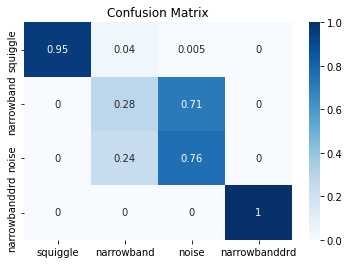

In [25]:
# Values of Recall from above confusion table can be seen on the diagonal below
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax = ax, cmap=plt.cm.Blues); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);